In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mstats

In [ ]:
data = pd.read_csv('loan_approval_dataset.csv')

In [ ]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
data.shape

(4269, 13)

In [ ]:
data.isnull().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.0,2.135000e+03,1.232498e+03,1.0,1068.0,2135.0,3202.0,4269.0
no_of_dependents,4269.0,2.498712e+00,1.695910e+00,0.0,1.0,3.0,4.0,5.0
income_annum,4269.0,5.059124e+06,2.806840e+06,200000.0,2700000.0,5100000.0,7500000.0,9900000.0
loan_amount,4269.0,1.513345e+07,9.043363e+06,300000.0,7700000.0,14500000.0,21500000.0,39500000.0
loan_term,4269.0,1.090045e+01,5.709187e+00,2.0,6.0,10.0,16.0,20.0
cibil_score,4269.0,5.999361e+02,1.724304e+02,300.0,453.0,600.0,748.0,900.0
residential_assets_value,4269.0,7.472617e+06,6.503637e+06,-100000.0,2200000.0,5600000.0,11300000.0,29100000.0
commercial_assets_value,4269.0,4.973155e+06,4.388966e+06,0.0,1300000.0,3700000.0,7600000.0,19400000.0
luxury_assets_value,4269.0,1.512631e+07,9.103754e+06,300000.0,7500000.0,14600000.0,21700000.0,39200000.0
bank_asset_value,4269.0,4.976692e+06,3.250185e+06,0.0,2300000.0,4600000.0,7100000.0,14700000.0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.nunique()

,0
loan_id,4269
no_of_dependents,6
education,2
self_employed,2
income_annum,98
loan_amount,378
loan_term,10
cibil_score,601
residential_assets_value,278
commercial_assets_value,188


In [ ]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
data['assets'] = data['residential_assets_value'] + data['commercial_assets_value'] + data['luxury_assets_value'] + data['bank_asset_value']

In [ ]:
data.drop(columns=['loan_id','residential_assets_value','commercial_assets_value',
       'luxury_assets_value','bank_asset_value'],inplace=True)

In [ ]:
numerical_features = data.select_dtypes('number')
categorical_features = data.select_dtypes('O')

In [ ]:
for features in categorical_features:
  print(f'{features}: ')
  print(data[features].unique())
  print('\n\n')

education: 
[' Graduate' ' Not Graduate']



self_employed: 
[' No' ' Yes']



loan_status: 
[' Approved' ' Rejected']





In [ ]:
for features in categorical_features:
   data[features] = data[features].apply(lambda x: x.strip())

In [ ]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,50700000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,17000000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,57700000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,52700000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,55000000


In [ ]:
data['loan_status'].value_counts()

,count
loan_status,
Approved,2656
Rejected,1613


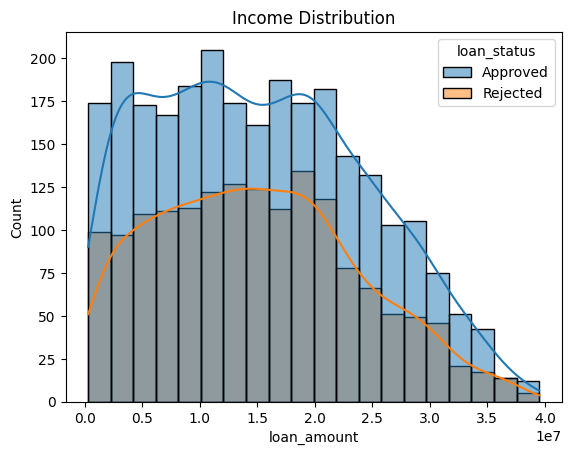

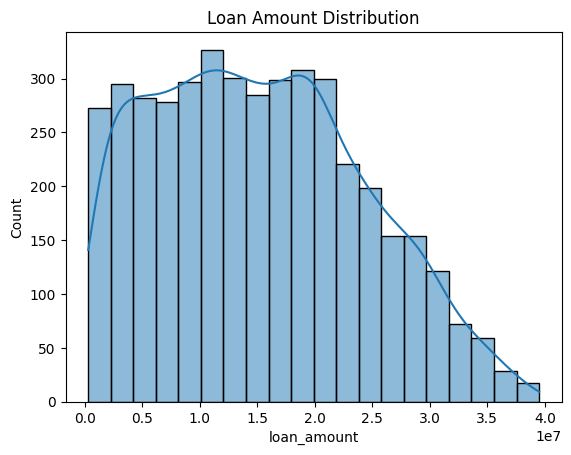

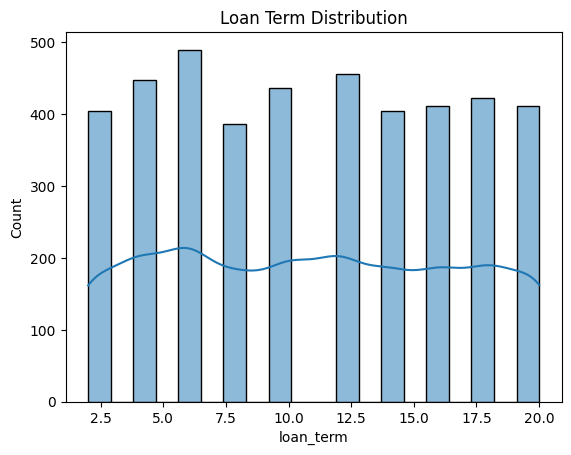

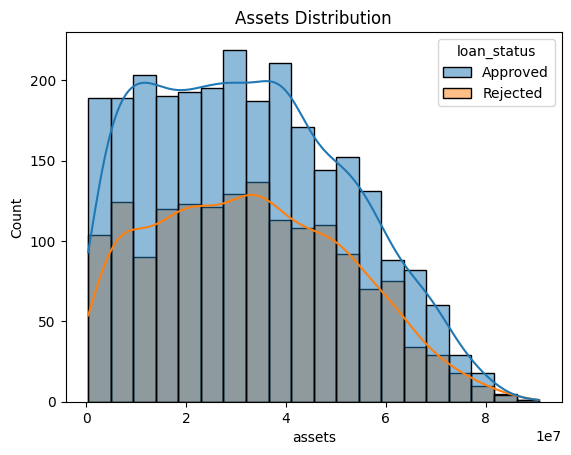

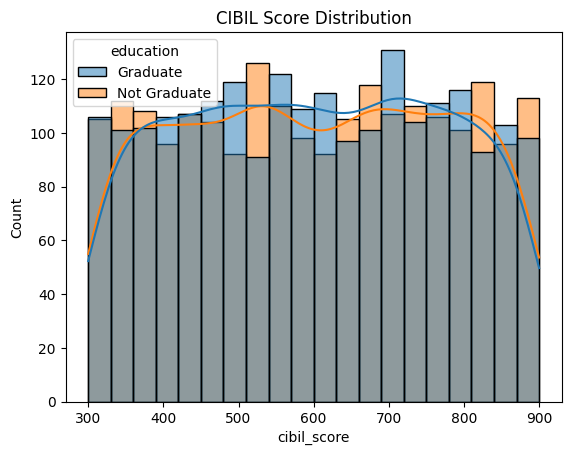

In [ ]:
sns.histplot(data=data,x='loan_amount', kde=True,bins=20,hue='loan_status')
plt.title("Income Distribution")
plt.show()

sns.histplot(data['loan_amount'], kde=True,bins=20)
plt.title("Loan Amount Distribution")
plt.show()

sns.histplot(data['loan_term'], kde=True,bins=20)
plt.title("Loan Term Distribution")
plt.show()

sns.histplot(data=data,x='assets', kde=True,bins=20,hue='loan_status')
plt.title("Assets Distribution")
plt.show()

sns.histplot(data=data,x='cibil_score', kde=True,bins=20,hue='education')
plt.title("CIBIL Score Distribution")
plt.show()


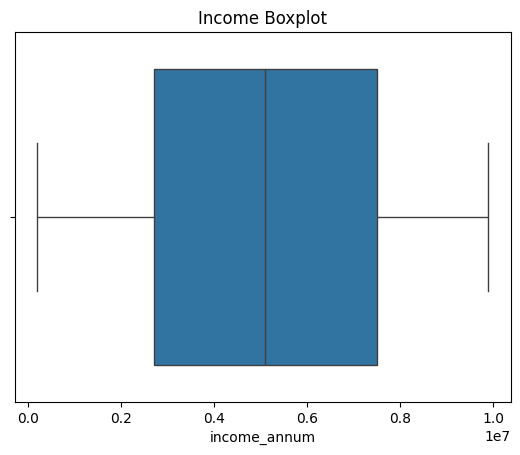

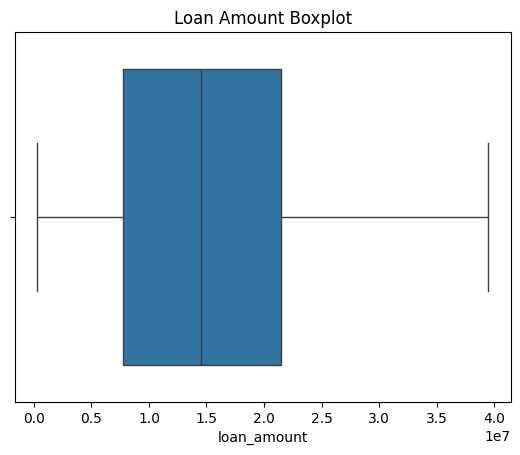

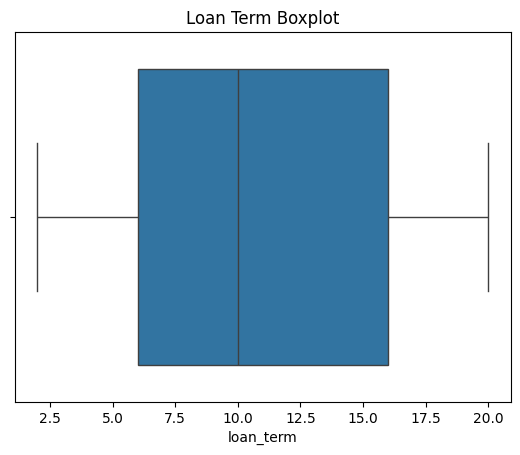

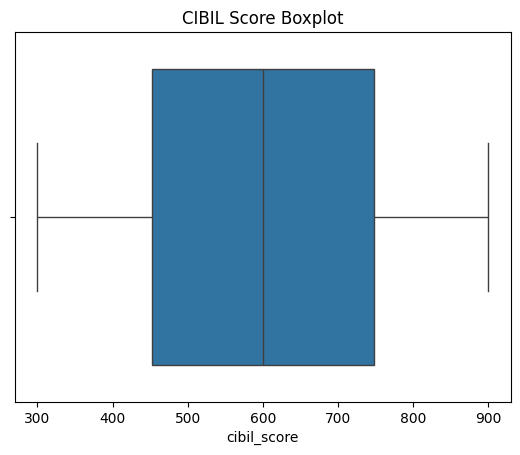

In [ ]:
sns.boxplot(x=data['income_annum'])
plt.title("Income Boxplot")
plt.show()

sns.boxplot(x=data['loan_amount'])
plt.title("Loan Amount Boxplot")
plt.show()

sns.boxplot(x=data['loan_term'])
plt.title("Loan Term Boxplot")
plt.show()

sns.boxplot(x=data['cibil_score'])
plt.title("CIBIL Score Boxplot")
plt.show()


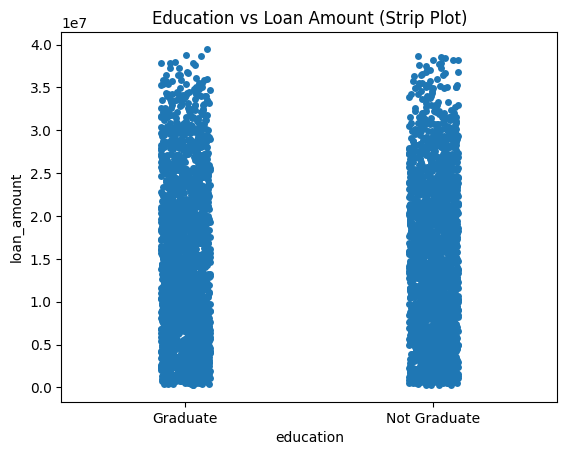

In [ ]:
sns.stripplot(x=data['education'], y=data['loan_amount'], jitter=True)
plt.title("Education vs Loan Amount (Strip Plot)")
plt.show()


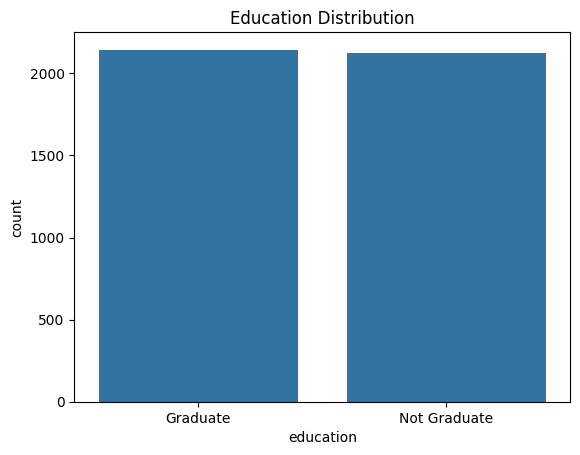

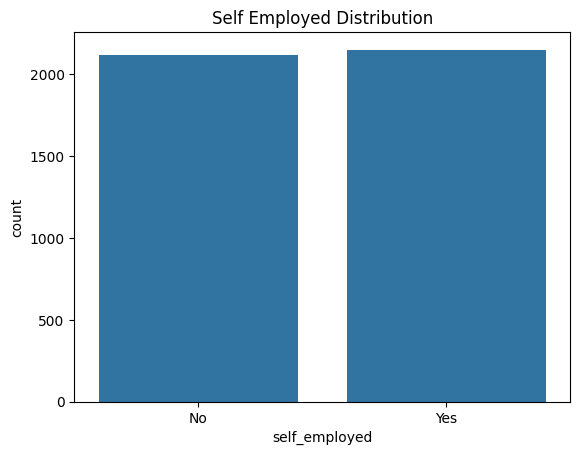

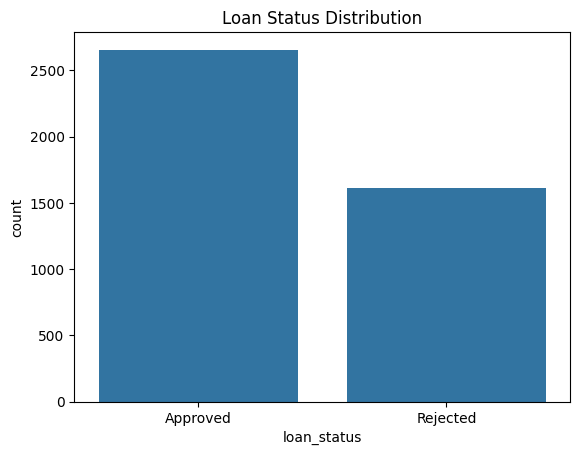

In [ ]:
sns.countplot(x=data['education'])
plt.title("Education Distribution")
plt.show()

sns.countplot(x=data['self_employed'])
plt.title("Self Employed Distribution")
plt.show()

sns.countplot(x=data['loan_status'])
plt.title("Loan Status Distribution")
plt.show()

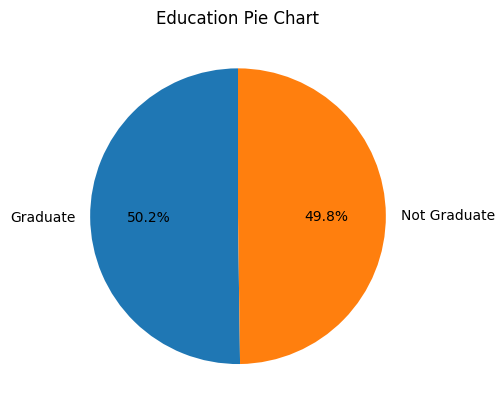

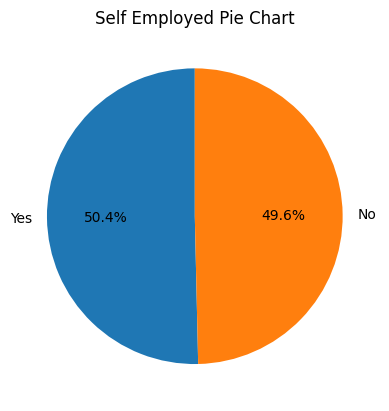

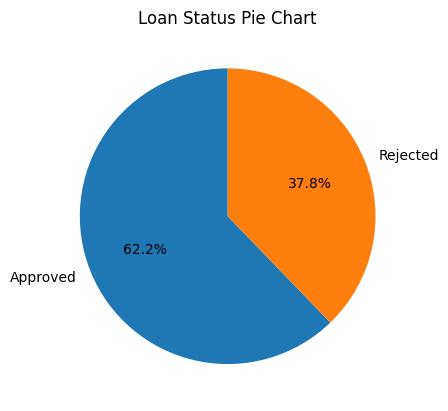

In [ ]:
data['education'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Education Pie Chart")
plt.ylabel('')
plt.show()

data['self_employed'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Self Employed Pie Chart")
plt.ylabel('')
plt.show()

data['loan_status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Loan Status Pie Chart")
plt.ylabel('')
plt.show()


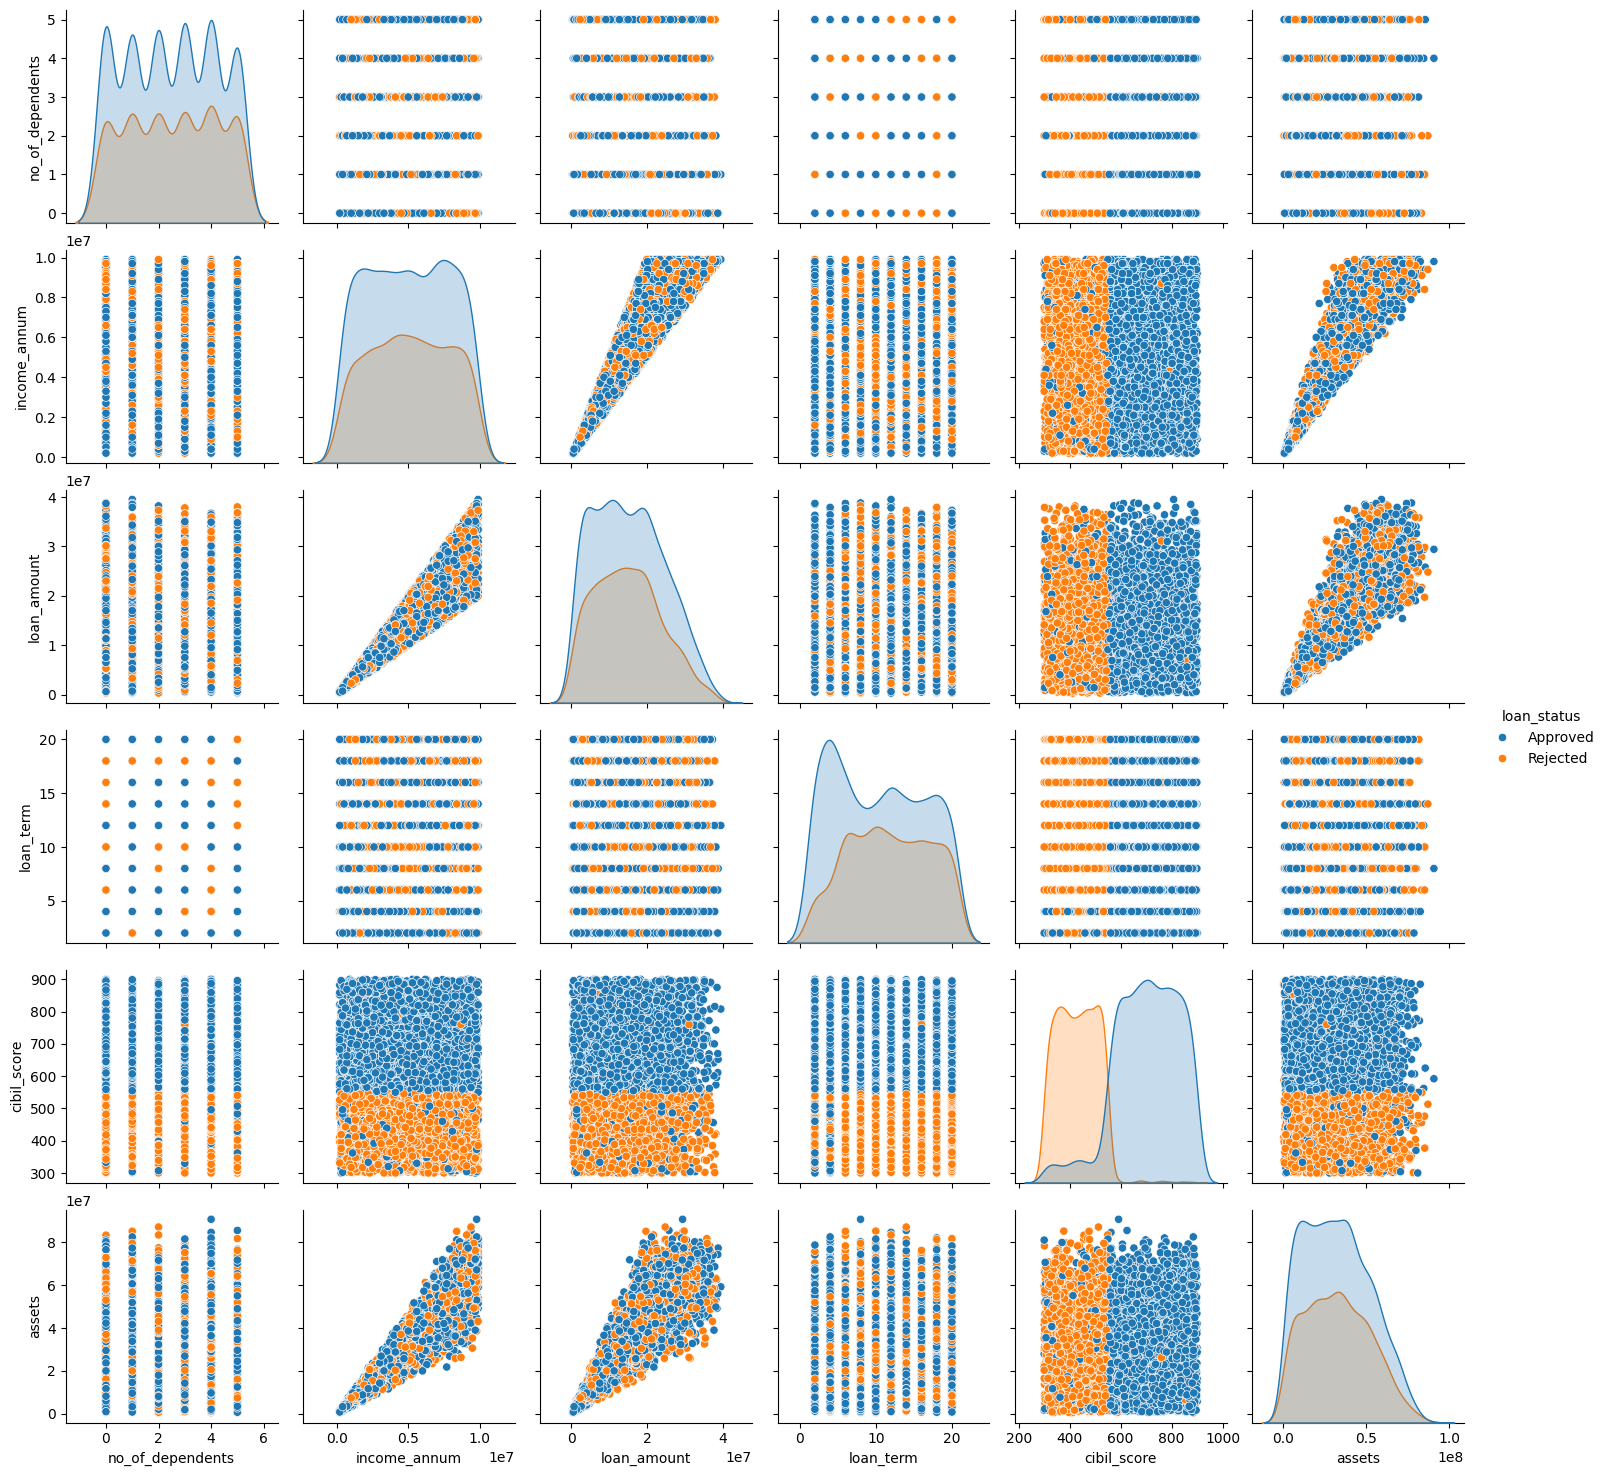

In [ ]:
sns.pairplot(data,hue = 'loan_status')
plt.show()

# Feature Engineering

In [ ]:
data['education'] = data['education'].map({'Graduate':1,'Not Graduate':0})
data['self_employed'] = data['self_employed'].map({'No':0,'Yes':1})
data['loan_status'] = data['loan_status'].map({'Approved':1,'Rejected':0})

In [ ]:
data['income_to_loan_ratio'] = data['income_annum'] / data['loan_amount']
data['loan_to_cibil_ratio'] = data['loan_amount'] / data['cibil_score']
data['loan_term_to_income_ratio'] = data['loan_term'] / data['income_annum']

In [ ]:
data['loan_amount'] = mstats.winsorize(data['loan_amount'], limits=[0.1, 0.1])
data['assets'] = mstats.winsorize(data['assets'], limits=[0.1, 0.1])

In [ ]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,assets,income_to_loan_ratio,loan_to_cibil_ratio,loan_term_to_income_ratio
0,2,1,0,9600000,28000000,12,778,1,50700000,0.321070,38431.876607,1.250000e-06
1,0,0,1,4100000,12200000,8,417,0,17000000,0.336066,29256.594724,1.951220e-06
2,3,1,0,9100000,28000000,20,506,0,57700000,0.306397,58695.652174,2.197802e-06
3,3,1,0,8200000,28000000,8,467,0,52700000,0.267101,65738.758030,9.756098e-07
4,5,0,1,9800000,24200000,20,382,0,55000000,0.404959,63350.785340,2.040816e-06


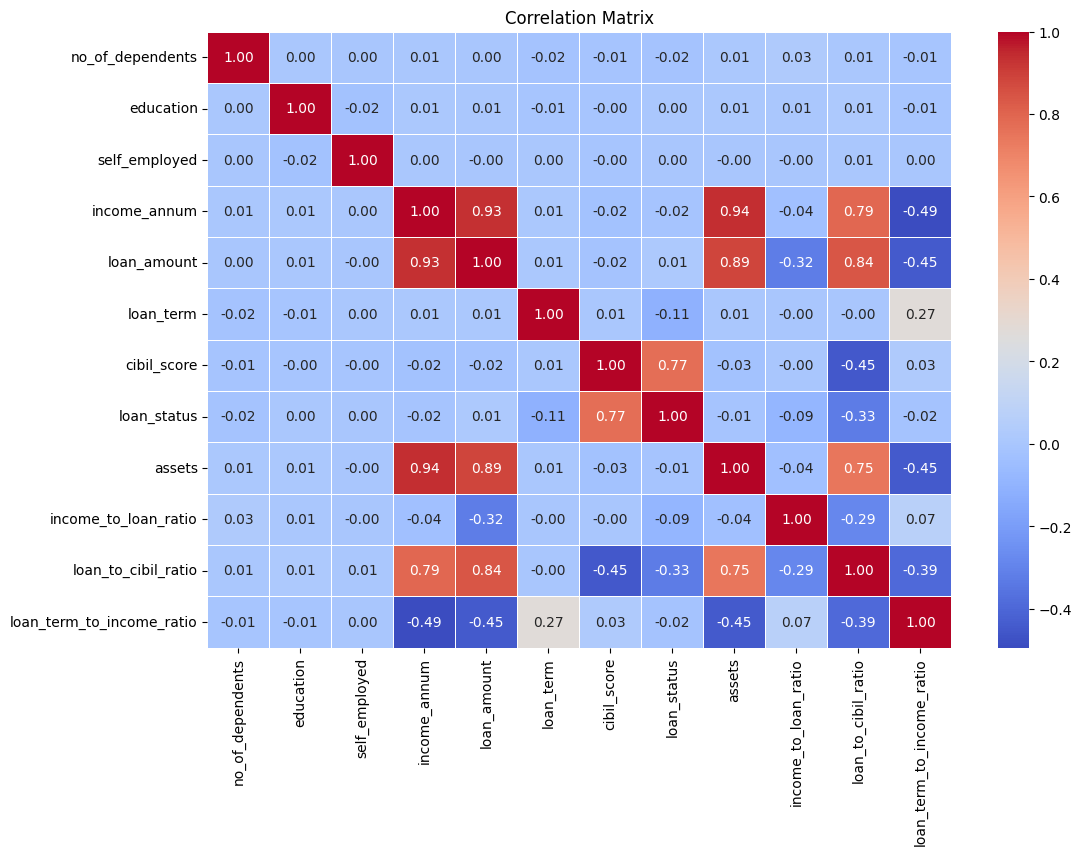

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
data.drop(columns=['cibil_score'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'loan_status', 'assets',
       'income_to_loan_ratio', 'loan_to_cibil_ratio',
       'loan_term_to_income_ratio'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Apply Chi-Square test
selector = SelectKBest(score_func=chi2, k=8)
X_new = selector.fit_transform(X, y)

selected_chi2_features = X.columns[selector.get_support()]
print("Chi-Square Selected Features:", selected_chi2_features)


Chi-Square Selected Features: Index(['no_of_dependents', 'education', 'income_annum', 'loan_amount',
       'loan_term', 'assets', 'income_to_loan_ratio', 'loan_to_cibil_ratio'],
      dtype='object')


In [ ]:
selected_chi2_features = selected_chi2_features.tolist()
selected_chi2_features.append('loan_status')
final_data = data[selected_chi2_features]

In [ ]:
data.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,loan_status,assets,income_to_loan_ratio,loan_to_cibil_ratio,loan_term_to_income_ratio
0,2,1,0,9600000,28000000,12,1,50700000,0.321070,38431.876607,1.250000e-06
1,0,0,1,4100000,12200000,8,0,17000000,0.336066,29256.594724,1.951220e-06
2,3,1,0,9100000,28000000,20,0,57700000,0.306397,58695.652174,2.197802e-06
3,3,1,0,8200000,28000000,8,0,52700000,0.267101,65738.758030,9.756098e-07
4,5,0,1,9800000,24200000,20,0,55000000,0.404959,63350.785340,2.040816e-06


In [ ]:
data['loan_status'] = data['loan_status'].map({1:'Approved',0:'Rejected'})
data['education'] = data['education'].map({1:'Graduate',0:'Not Graduate'})
data['self_employed'] = data['self_employed'].map({0:'No',1:'Yes'})

In [ ]:
data.to_csv('final_data.csv', index=False)